# Hypothesis testing validation

Power analysis for DM, DV, and DC

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy.api as sc
import scipy as sp
import itertools
import numpy as np
import scipy.stats as stats
from scipy.integrate import dblquad
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
import imp
pd.options.display.max_rows = 999
pd.set_option('display.max_colwidth', -1)
import pickle as pkl
import time

In [10]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)


In [11]:
import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/scmemo')
import estimator, simulate, scmemo, bootstrap, util, hypothesis_test

In [12]:
import sys
sys.path.append('/home/ssm-user/Github/single_cell_eb/')
sys.path.append('/home/ssm-user/Github/single_cell_eb/sceb')
import scdd

### 1D Hypothesis test

In [366]:
true_data = simulate.simulate_transcriptomes(10000, 100, correlated=False)
qs, captured_data = simulate.capture_sampling(true_data, q=0.1, q_sq=0.011)


In [367]:
imp.reload(estimator)
imp.reload(bootstrap)
imp.reload(scmemo)
imp.reload(util)

adata = sc.AnnData(sp.sparse.csr_matrix(captured_data))
adata.obs['ct'] = np.random.choice(2, adata.shape[0])
# adata.obs['ind'] = np.random.choice(list('aef'), adata.shape[0])

adata_scmemo = adata.copy()
adata_scmemo.X = adata_scmemo.X.astype(np.int64)
scmemo.create_groups(adata_scmemo, label_columns=['ct'], inplace=True)

scmemo.compute_1d_moments(adata_scmemo, inplace=True, filter_genes=True, residual_var=True, use_n_umi=True)

(308,)


In [389]:
%%time
imp.reload(hypothesis_test)
imp.reload(scmemo)
imp.reload(estimator)
imp.reload(bootstrap)
a = scmemo.ht_1d_moments(
	adata_scmemo, 
	formula_like='1 + ct',
	cov_column='ct',
	inplace=False, 
	use_residual_var=False, 
	num_boot=10000, 
	bins=10,
	dirichlet_approx=True,
    log=False)

CPU times: user 6.9 s, sys: 150 µs, total: 6.9 s
Wall time: 6.9 s


In [390]:
x = a.uns['scmemo']['1d_ht']['var_asl']
x = x - x.min()
x = x / x.max()

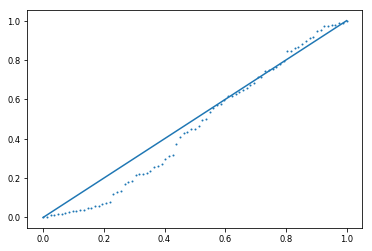

In [391]:
plt.scatter(
    np.linspace(0, 1, a.uns['scmemo']['1d_ht']['var_asl'].shape[0]), 
    np.sort(x), s=1)
plt.plot([0, 1], [0, 1])

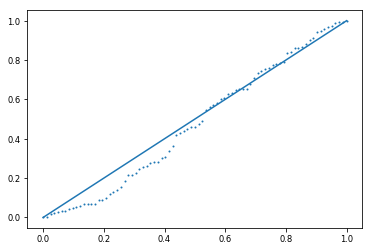

In [385]:
plt.scatter(
    np.linspace(0, 1, a.uns['scmemo']['1d_ht']['var_asl'].shape[0]), 
    np.sort(x), s=1)
plt.plot([0, 1], [0, 1])

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 5)

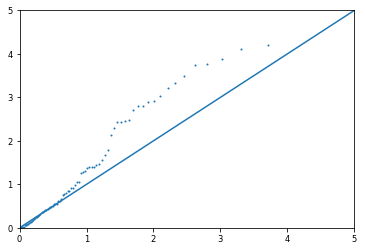

In [375]:
plt.scatter(
    -np.log(np.linspace(0, 1, a.uns['scmemo']['1d_ht']['var_asl'].shape[0])), 
    -np.log(np.sort(x)), s=1)
plt.plot([0, 6], [0, 6])
plt.xlim(0,5)
plt.ylim(0,5)

(array([75., 70., 84., 68., 53., 71., 72., 65., 60., 57., 68., 64., 54.,
        64., 75.]),
 array([2.75565601e-05, 6.66520843e-02, 1.33276612e-01, 1.99901140e-01,
        2.66525667e-01, 3.33150195e-01, 3.99774723e-01, 4.66399251e-01,
        5.33023778e-01, 5.99648306e-01, 6.66272834e-01, 7.32897361e-01,
        7.99521889e-01, 8.66146417e-01, 9.32770945e-01, 9.99395472e-01]),
 <a list of 15 Patch objects>)

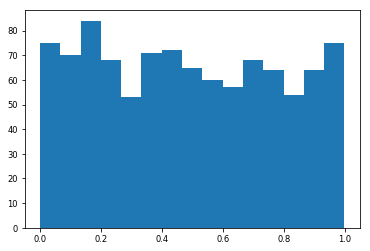

In [330]:
plt.hist(unif, bins=15)

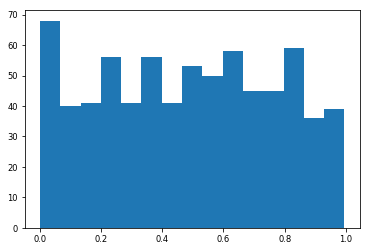

In [327]:
plt.hist(a.uns['scmemo']['1d_ht']['var_asl'], bins=15);

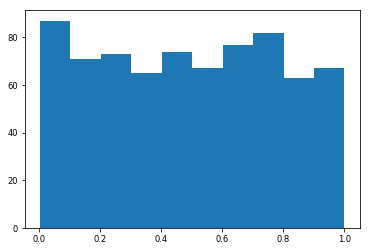

In [243]:
plt.hist(a.uns['scmemo']['1d_ht']['var_asl'], bins=10);

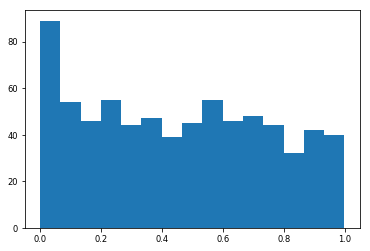

In [227]:
plt.hist(a.uns['scmemo']['1d_ht']['var_asl'], bins=15);

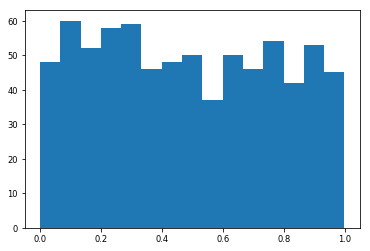

In [188]:
plt.hist(a.uns['scmemo']['1d_ht']['var_asl'], bins=15);

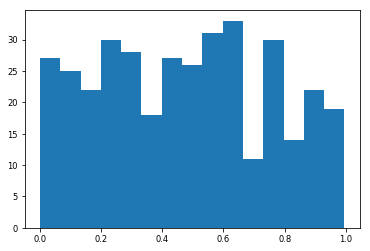

In [105]:
plt.hist(a.uns['scmemo']['1d_ht']['mean_asl'], bins=15);

## 

In [42]:
from sklearn.impute import SimpleImputer

In [44]:
a = np.array([1, 2, 3])

In [45]:
eval('a')

array([1, 2, 3])

In [534]:
imp.reload(hypothesis_test)
imp.reload(scmemo)
a = scmemo.ht_1d_moments(adata_scmemo, 'ct', inplace=False, use_residual_var=True)

In [535]:
a.uns['scmemo']['1d_ht']['design_matrix']

DesignMatrix with shape (2, 2)
  Intercept  ct[T.PBMC]
          1           1
          1           0
  Terms:
    'Intercept' (column 0)
    'ct' (column 1)

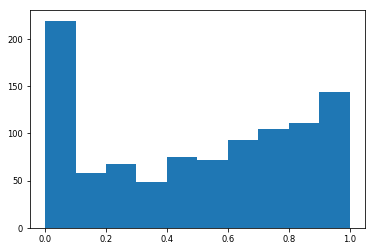

In [531]:
plt.hist(a.uns['scmemo']['1d_ht']['var_result'][2][1, :]);

In [491]:
%%time
# res_1 = scmemo.bootstrap_1d_moments(adata_scmemo, inplace=False, num_boot=100000, verbose=True, bins=1)
# res_2 = scmemo.bootstrap_1d_moments(adata_scmemo, inplace=False, num_boot=100000, verbose=True, bins=2)
res_3 = scmemo.bootstrap_1d_moments(adata_scmemo, inplace=False, num_boot=1000, verbose=True, bins=3)


sg^PBMC
CPU times: user 127 ms, sys: 60 ms, total: 186 ms
Wall time: 186 ms


In [463]:
from statsmodels.distributions.empirical_distribution import ECDF

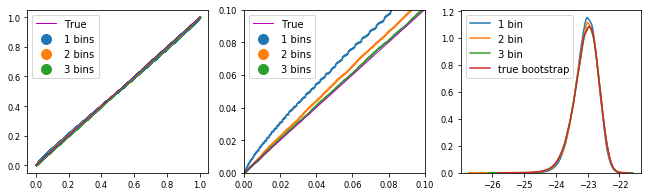

In [489]:
plt.figure(figsize=(11, 3))
plt.subplot(1, 3, 1)
plt.plot([-0,1], [-0,1], lw=1, color='m')
plt.scatter(
    ecdf.y[1:],
    ecdf(np.sort(np.log(res_1[1]))),
    s=0.01)
plt.scatter(
    ecdf.y[1:],
    ecdf(np.sort(np.log(res_2[1]))),
    s=0.01)
plt.scatter(
    ecdf.y[1:],
    ecdf(np.sort(np.log(res_3[1]))),
    s=0.01)
plt.legend(['True', '1 bins', '2 bins', '3 bins'], markerscale=100)

plt.subplot(1, 3, 2)
plt.plot([-0,1], [-0,1], lw=1, color='m')
plt.scatter(
    ecdf.y[1:],
    ecdf(np.sort(np.log(res_1[1]))),
    s=0.01)
plt.scatter(
    ecdf.y[1:],
    ecdf(np.sort(np.log(res_2[1]))),
    s=0.01)
plt.scatter(
    ecdf.y[1:],
    ecdf(np.sort(np.log(res_3[1]))),
    s=0.01)
plt.xlim(0, .1); plt.ylim(0, .1)
plt.legend(['True', '1 bins', '2 bins', '3 bins'], markerscale=100)

plt.subplot(1, 3, 3)
sns.distplot(np.log(res_1[1]), hist=False, label='1 bin')
sns.distplot(np.log(res_2[1]), hist=False, label='2 bin')
sns.distplot(np.log(res_3[1]), hist=False, label='3 bin')
sns.distplot(np.log(real_boot_vars), hist=False, label='true bootstrap')


### testout statsmodels

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [9]:
smf.wls

<bound method Model.from_formula of <class 'statsmodels.regression.linear_model.WLS'>>

In [495]:
nsample = 4
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, (x - 5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, -0.01]
sig = 0.5
w = np.ones(nsample)
w[nsample * 6//10:] = 10
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + sig * w * e

In [496]:
def wlstq(X, y, weights):
    """ Perform weighted least squares and return the coefficients and the p-values. """

    inv = np.linalg.inv(X.T.dot(weights.reshape(-1,1)*X))
    beta = inv.dot(X.T*weights).dot(y)
    stde = np.sqrt(np.diag(inv))
        
    pval = 2*(1-stats.norm.cdf(np.abs(beta), 0, stde))
    
    return beta, stde, pval

In [6]:
a = np.array([1, 2, 3])

In [7]:
np.minimum(a, 10-a)

array([1, 2, 3])

In [497]:
%%time
wlstq(X, y, 1/w**2)

CPU times: user 1.26 ms, sys: 39 µs, total: 1.3 ms
Wall time: 472 µs


(array([ 5.18047275e+00,  4.30319706e-01, -1.95500966e-03]),
 array([1.2376279 , 0.20249106, 0.03845486]),
 array([2.84153475e-05, 3.35758176e-02, 9.59453751e-01]))

In [498]:
sm.WLS(y, X, weights=1./(w ** 2)).fit().summary()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            WLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     12.71
Date:                Wed, 06 May 2020   Prob (F-statistic):              0.195
Time:                        22:35:34   Log-Likelihood:                -4.2024
No. Observations:                   4   AIC:                             14.40
Df Residuals:                       1   BIC:                             12.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1805      0.542      9.566      0.066      -1.701      12.062
x1             0.4303      0.089      4.857      0.129      -0.696       1.556
x2            -0.0020      0.017     -0.116      0.926      -0.216       0.212
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.678
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.680
Skew:                           0.923   Prob(JB):                        0.712
Kurtosis:                       2.180   Cond. No.                         43.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
a = b = []

In [173]:
a

[]

In [175]:
a.append(1)

In [176]:
b

[1]

In [171]:
a, b, = []

ValueError: not enough values to unpack (expected 2, got 0)

In [159]:
from patsy import dmatrix, demo_data, ContrastMatrix, Poly, ModelDesc

In [160]:
ModelDesc.from_formula("y ~ x + x + x")

ModelDesc(lhs_termlist=[Term([EvalFactor('y')])],
          rhs_termlist=[Term([]), Term([EvalFactor('x')])])

In [147]:
data = demo_data("a", nlevels=3)

In [150]:
data = demo_data("a", "b", "x1", "x2")

In [151]:
data

{'a': ['a1', 'a1', 'a2', 'a2', 'a1', 'a1', 'a2', 'a2'],
 'b': ['b1', 'b2', 'b1', 'b2', 'b1', 'b2', 'b1', 'b2'],
 'x1': array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721]),
 'x2': array([-0.10321885,  0.4105985 ,  0.14404357,  1.45427351,  0.76103773,
         0.12167502,  0.44386323,  0.33367433])}

In [544]:
a = dmatrix("x2 + b + x1 + a", pd.DataFrame(data))
a

DesignMatrix with shape (8, 5)
  Intercept  b[T.b2]  a[T.a2]        x2        x1
          1        0        0  -0.10322   1.76405
          1        1        0   0.41060   0.40016
          1        0        1   0.14404   0.97874
          1        1        1   1.45427   2.24089
          1        0        0   0.76104   1.86756
          1        1        0   0.12168  -0.97728
          1        0        1   0.44386   0.95009
          1        1        1   0.33367  -0.15136
  Terms:
    'Intercept' (column 0)
    'b' (column 1)
    'a' (column 2)
    'x2' (column 3)
    'x1' (column 4)

In [545]:
a.design_info.column_names

['Intercept', 'b[T.b2]', 'a[T.a2]', 'x2', 'x1']

In [354]:
dir(a.__dict__['design_info'])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_repr_pretty_',
 'builder',
 'column_name_indexes',
 'column_names',
 'describe',
 'design_info',
 'factor_infos',
 'from_array',
 'linear_constraint',
 'slice',
 'subset',
 'term_codings',
 'term_name_slices',
 'term_names',
 'term_slices',
 'terms']

In [348]:
dir(a)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__r

In [164]:
len(a)

8

In [101]:
%%time
df = pd.DataFrame(data=X, columns=['a', 'b'])
df['c'] = y
smf.wls('c ~ a + b', weights=1/w**2, data=df).fit().summary()

CPU times: user 12.7 ms, sys: 6 µs, total: 12.7 ms
Wall time: 11.6 ms


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       0.861
Model:                            WLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     297.0
Date:                Wed, 06 May 2020   Prob (F-statistic):           3.40e-22
Time:                        18:13:19   Log-Likelihood:                -64.858
No. Observations:                  50   AIC:                             133.7
Df Residuals:                      48   BIC:                             137.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7091      0.094     28.874      0.000       2.520       2.898
a              2.7091      0.094     28.874      0.000       2.520       2.898
b              0.4089      0.024     17.234      0.000       0.361       0.457
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.030
Skew:                           0.010   Prob(JB):                        0.985
Kurtosis:                       2.882   Cond. No.                     3.66e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
a['coef']

TypeError: 'Summary' object is not subscriptable

In [39]:
sm.WLS(y, X, weights=1./(w ** 2)).fit().summary()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            WLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     61.43
Date:                Wed, 06 May 2020   Prob (F-statistic):             0.0808
Time:                        17:58:38   Log-Likelihood:                -1.0603
No. Observations:                   3   AIC:                             6.121
Df Residuals:                       1   BIC:                             4.318
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6900      0.604     11.068      0.057      -0.991      14.370
x1             0.3004      0.038      7.838      0.081      -0.187       0.787
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.457
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.421
Skew:                          -0.528   Prob(JB):                        0.810
Kurtosis:                       1.500   Cond. No.                         49.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X

array([[ 1.,  0.],
       [ 1.,  5.],
       [ 1., 10.],
       [ 1., 15.],
       [ 1., 20.]])